# Cardiovascular Disease Analysis and Predictions

### Cardiovascular Disease (CVD) dataset which consists of 70000 records of patient data. 
The ultimate goal of this project is to predict whether a person is suffering from cardiovascular disease or not.

### Cardiovascular diseases are a group of disorders of the heart and blood vessels and they include:
coronary heart disease – a disease of the blood vessels supplying the heart muscle.
cerebrovascular disease – a disease of the blood vessels supplying the brain.
peripheral arterial disease – a disease of blood vessels supplying the arms and legs.
rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria.
congenital heart disease – malformations of heart structure existing at birth.
deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.
The WHO states that 17.9 million people die from CVD in 2016 which is 31% of the total deaths in the world. (Cardiovascular diseases (CVDs), 2020) So From these facts and figures, we can easily conclude that Cardiovascular disease (CVD) accounts for the majority of death and hospitalization, health care expenditures, and loss of productivity in a developed country. With the help of data science, we will predict the possibility of a person having Cardiovascular disease based on various parameters specified in this dataset


### Analysis:
DataSet description:
So, this Dataset contains the following Features : 
    • id: It's just the Id no of the row. Not relevant 
        • age: It's the age of a person in Days 
            • gender: It's the gender of the person 
                • height: It's the height of the person in cm 
                    • weight: It's the weight of the person in kg 
                        • ap_hi: It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value- 120mmhg or Below • ap_low: It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value- 80mmhg or Below • cholesterol: It's the Cholesterol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Borderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Borderline High • gluc: It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL • smoke: It contains Binary Values stating whether Person is a Smoker or not i.e. {0: 'Not a Smoker', 1: 'Smoker'}
• alco: It contains Binary Values stating whether Person is an alcoholic or not i.e. {0: 'Not an Alcoholic', 1: 'Alcoholic'} • active: It contains Binary Values stating whether Person is involved in physical activities or not i.e. {0: 'Not involved in Physical Activities', 1: 'involved in physical activities'} • cardio: It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e. {0: 'Not Have CVD', 1: 'Have CVD'}


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data set
df = pd.read_csv("cardio_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Fuction to identify the missing values. input to this function is the dataframe
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [5]:
print(format(df.duplicated().sum()))

0


In [ ]:
#Converting Age values from days to years
df['age'] = df['age'].div(365).apply(lambda x:int(x))

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,52.840671,6.766774,29.0,48.00,53.0,58.00,64.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [10]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


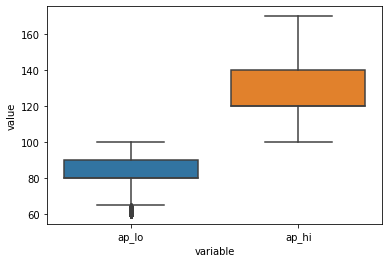

In [11]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

### First, we check in how many columns the diastolic pressure is higher than the systolic pressure because always the systolic pressure should be higher than diastolic pressure. The result we get is the are 1234 cases. 
From the above description, we could see the values that fall below 2.5% or above 97.5% of a given range are not normal. The normal systolic pressure is 120 (ap_hi) and the normal diastolic pressure is 80 (ap_lo). So we remove those values and plot the box plot from which we could see (ap_lo) values are from 70 to 110 and (ap_hi) values are from 110 to 180.


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,66193.0,49978.756696,28858.602294,0.0,24962.0,50030.0,74889.0,99999.0
age,66193.0,52.857069,6.760363,29.0,48.0,53.0,58.0,64.0
gender,66193.0,1.350007,0.476975,1.0,1.0,1.0,2.0,2.0
height,66193.0,164.428414,8.153724,55.0,159.0,165.0,170.0,250.0
weight,66193.0,74.094533,14.130058,11.0,65.0,72.0,82.0,200.0
ap_hi,66193.0,126.252519,14.459022,100.0,120.0,120.0,140.0,170.0
ap_lo,66193.0,81.183962,8.403263,60.0,80.0,80.0,90.0,100.0
cholesterol,66193.0,1.360869,0.677058,1.0,1.0,1.0,1.0,3.0
gluc,66193.0,1.223936,0.570739,1.0,1.0,1.0,1.0,3.0
smoke,66193.0,0.087502,0.282571,0.0,0.0,0.0,0.0,1.0


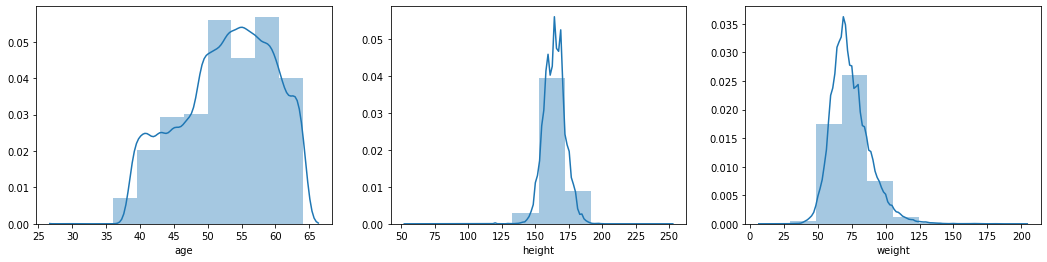

In [13]:
# Distributions of age, height and weight variables
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(df.age, bins=10, kde=True, ax=axes[0])
sns.distplot(df.height, bins=10, kde=True, ax=axes[1])
sns.distplot(df.weight, bins=10, kde=True, ax=axes[2])

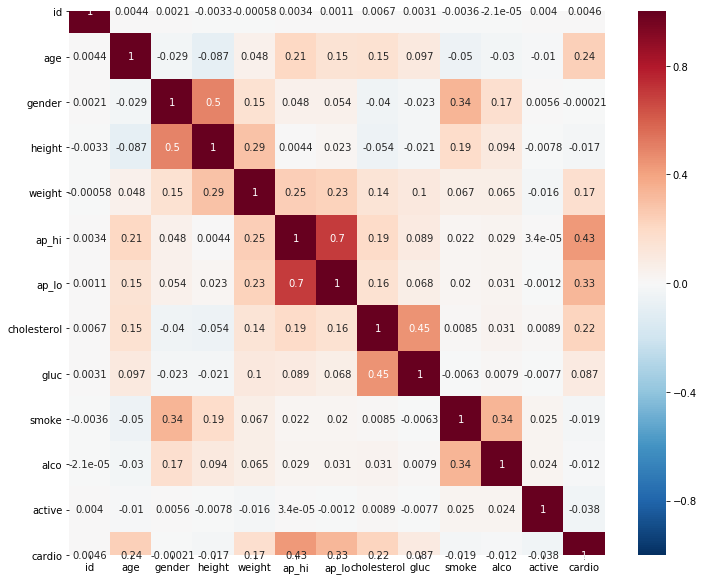

In [31]:
correlation = df.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.savefig("corr.png")

In [15]:
# Import train_test_split and divide data into X and y components
from sklearn.model_selection import train_test_split

y = df['cardio']
X = df.drop(['cardio'], axis=1, inplace=False)
X.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50,2,168,62.0,110,80,1,1,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25, 
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 49644 samples.
Testing set has 16549 samples.


In [17]:
#Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13,criterion="entropy")
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(DT_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6612 1793]
 [2804 5340]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8405
           1       0.75      0.66      0.70      8144

    accuracy                           0.72     16549
   macro avg       0.73      0.72      0.72     16549
weighted avg       0.73      0.72      0.72     16549

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


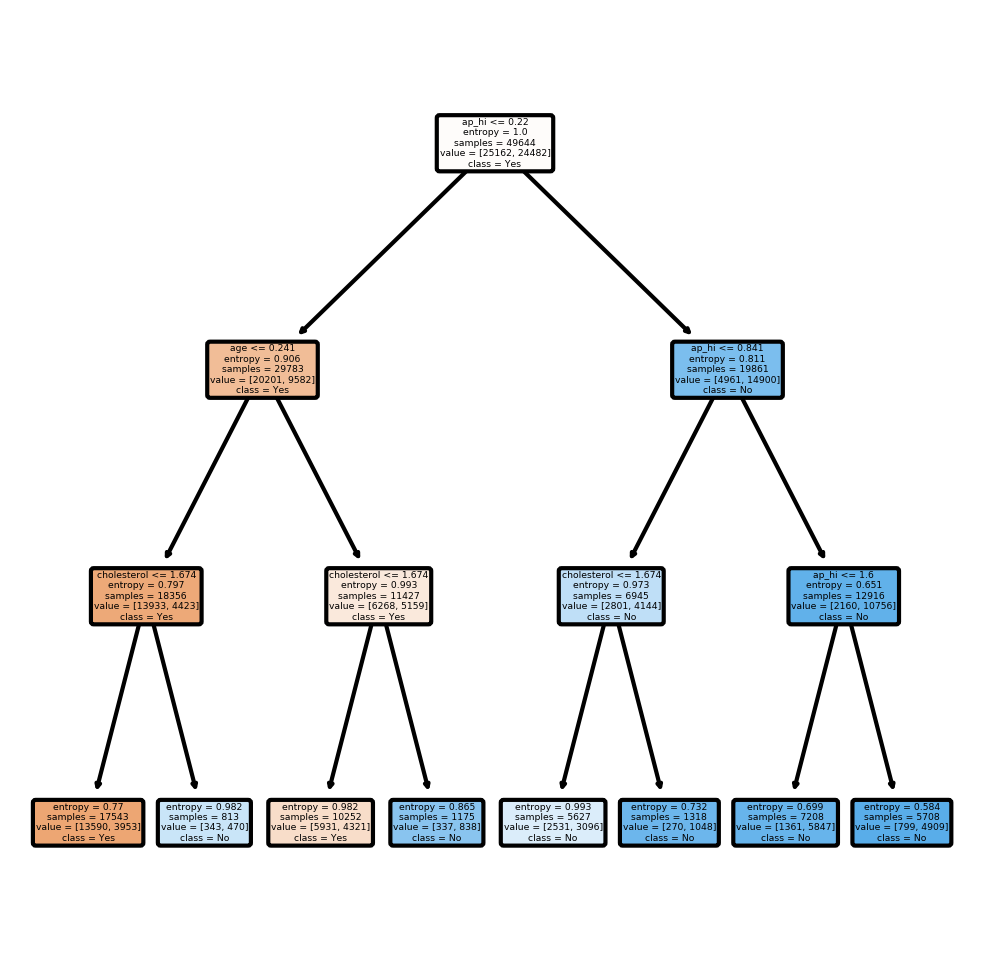

In [19]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DT_predictor,
               feature_names = X.columns, 
               class_names=['Yes','No'],
               rounded=True,
               filled = True);
fig.savefig('Heart_disease.png')

In [20]:
# Import Random Forest classification model from sklearn
from sklearn.ensemble import RandomForestClassifier

RF_predictor = RandomForestClassifier(n_estimators=50, random_state=17)
RF_predictor.fit(X_train, y_train)
y_predicted = RF_predictor.predict(X_test)
y_predicted

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
RF_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(RF_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6298 2107]
 [2609 5535]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      8405
           1       0.72      0.68      0.70      8144

    accuracy                           0.72     16549
   macro avg       0.72      0.71      0.71     16549
weighted avg       0.72      0.72      0.71     16549

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


In [22]:
# Import KNN classification model from sklearn
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=25)
KNN_classifier.fit(X_train, y_train)
y_predicted = KNN_classifier.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
KNN_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(KNN_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6506 1899]
 [2689 5455]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8405
           1       0.74      0.67      0.70      8144

    accuracy                           0.72     16549
   macro avg       0.72      0.72      0.72     16549
weighted avg       0.72      0.72      0.72     16549

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


Text(0, 0.5, 'Error Rate')

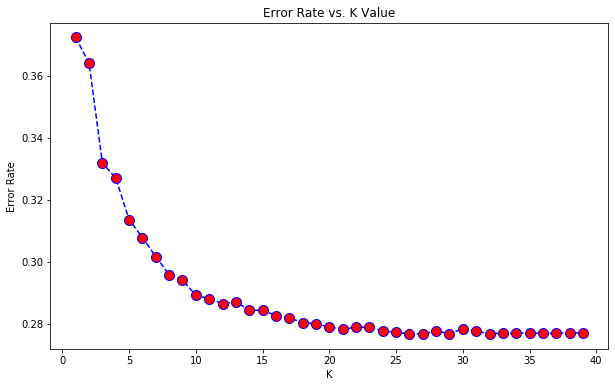

In [24]:
#Finding the best K value
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
#To improve the accuracy
KNN_classifier = KNeighborsClassifier(n_neighbors=35)
KNN_classifier.fit(X_train, y_train)
y_predicted = KNN_classifier.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
KNN_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(KNN_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6577 1828]
 [2757 5387]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      8405
           1       0.75      0.66      0.70      8144

    accuracy                           0.72     16549
   macro avg       0.73      0.72      0.72     16549
weighted avg       0.73      0.72      0.72     16549

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


In [39]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0, penalty = 'l1', C = 1.0, solver = 'liblinear') 
classifier.fit(X_train,y_train) 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


In [40]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_pred))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("------------------------------------------------------")
print("Overall accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6691 1714]
 [2828 5316]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      8405
           1       0.76      0.65      0.70      8144

    accuracy                           0.73     16549
   macro avg       0.73      0.72      0.72     16549
weighted avg       0.73      0.73      0.72     16549

------------------------------------------------------
Overall accuracy score: 0.7255423288416218
------------------------------------------------------


AUC: 0.79


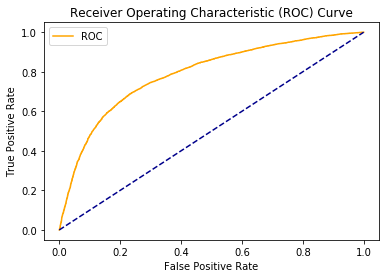

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Finding:
Since we are dealing with problems impacting human health, I wanted to ensure we have an accurate model not risking someone’s health in danger. In that case, it is not a big threat in the case if a model predicts a non-CVD case as CVD (False Positive) as we can examine it again with one more change. The most risking factor is predicting a CVD case as non CVD (False negative) as it is threatening to patients' life.
Considering False Negative as a major factor,  will choose Random forest as our model for the problem since it is more important to have lower false-negative cases. In this case, a random forest is with FN as 15%(lower comparing other models) with 72% accuracy